In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from wordcloud import WordCloud
import plotly.express as px
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates


In [2]:
df = pd.read_csv(r"C:\Users\yahia\Downloads\terrorism\globalterrorismdb_0718dist.csv", encoding='latin-1')



In [40]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df_1=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df_1['casualities']=df_1['Killed']+df_1['Wounded']


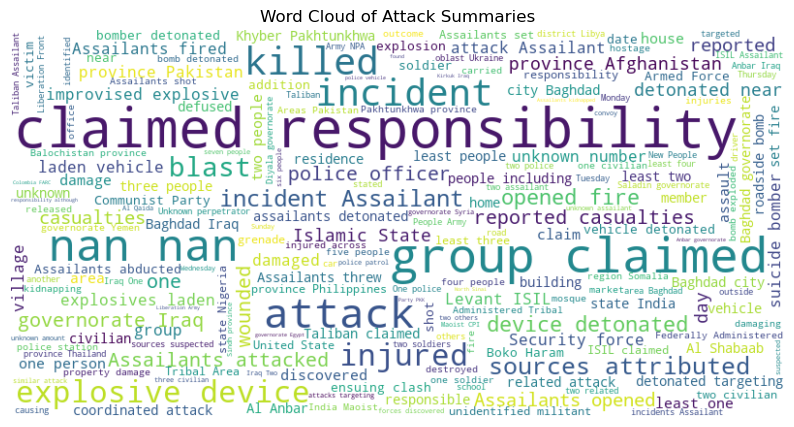

In [4]:


# Convert the 'Summary' column to strings
df_1['Summary'] = df_1['Summary'].astype(str)

# Concatenate all the summaries into a single string
text = ' '.join(df_1['Summary'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Attack Summaries')
plt.show()


In [5]:
df_1.shape

(181691, 18)

In [6]:
df_1.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     nan   
1     0.0      0.0  Nadine Chaval, daughter     nan   
2     1.0      0.0                 Employee     nan   
3     NaN      NaN             U.S. Embassy     nan   
4     NaN      NaN           U.S. Consulate     nan   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0  
3  Explosives    NaN          NaN  
4  Incendiary    NaN          NaN

In [7]:
# Convert 'Year', 'Month', and 'Day' columns to date/time data types
df_1['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df_1['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')
df_1['Day'] = pd.to_datetime(df['Day'], format='%d', errors='coerce')

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Year         181691 non-null  datetime64[ns]
 1   Month        181671 non-null  datetime64[ns]
 2   Day          180800 non-null  datetime64[ns]
 3   Country      181691 non-null  object        
 4   Region       181691 non-null  object        
 5   city         181257 non-null  object        
 6   latitude     177135 non-null  float64       
 7   longitude    177134 non-null  float64       
 8   AttackType   181691 non-null  object        
 9   Killed       171378 non-null  float64       
 10  Wounded      165380 non-null  float64       
 11  Target       181055 non-null  object        
 12  Summary      181691 non-null  object        
 13  Group        181691 non-null  object        
 14  Target_type  181691 non-null  object        
 15  Weapon_type  181691 non-null  obje

In [9]:
# Replace "Nan" with 0 in the specified columns
columns_to_fill = ['Killed', 'Wounded', 'casualities']
df_1[columns_to_fill] = df_1[columns_to_fill].fillna(0)

In [10]:
# Drop rows with NaN values in 'latitude' and 'longitude'
df_1.dropna(subset=['latitude', 'longitude'], inplace=True)

# Verify the changes
print(df_1[['latitude', 'longitude']].isnull().sum())  # Check if there are any remaining NaN values


latitude     0
longitude    0
dtype: int64


In [11]:
df_1.head(2)

Year      Month        Day             Country  \
0 1970-01-01 1900-07-01 1900-01-02  Dominican Republic   
1 1970-01-01        NaT        NaT              Mexico   

                        Region           city   latitude  longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792 -69.951164   
1                North America    Mexico city  19.371887 -99.086624   

                    AttackType  Killed  Wounded                   Target  \
0                Assassination     1.0      0.0             Julio Guzman   
1  Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter   

  Summary                               Group                  Target_type  \
0     nan                              MANO-D  Private Citizens & Property   
1     nan  23rd of September Communist League      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0

In [12]:
categorical_columns = ['Country', 'Region', 'AttackType', 'Target_type', 'Weapon_type', 'Group']


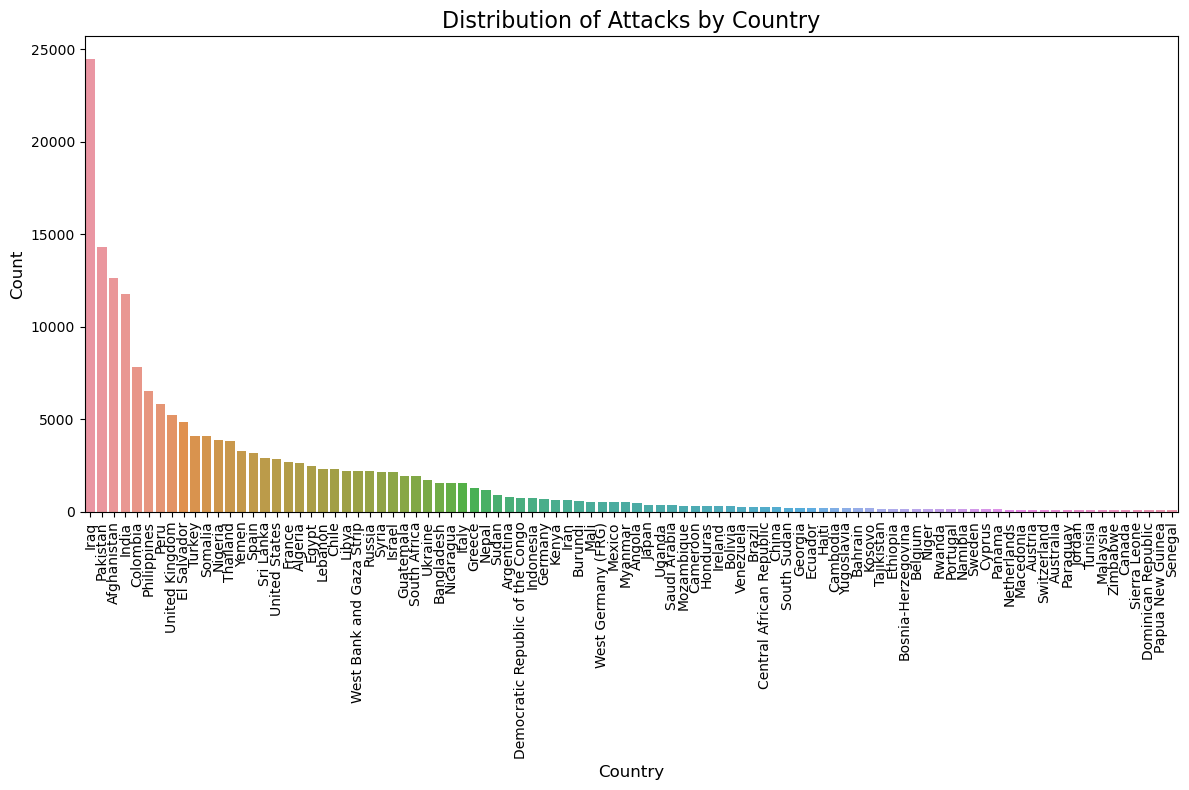

In [13]:
# Frequency distribution for 'Country'
freq_counts_country = df_1['Country'].value_counts()
selected_countries = freq_counts_country[freq_counts_country >= 80].index

plt.figure(figsize=(12, 8))
sns.countplot(data=df_1, x='Country', order=selected_countries)
plt.title("Distribution of Attacks by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

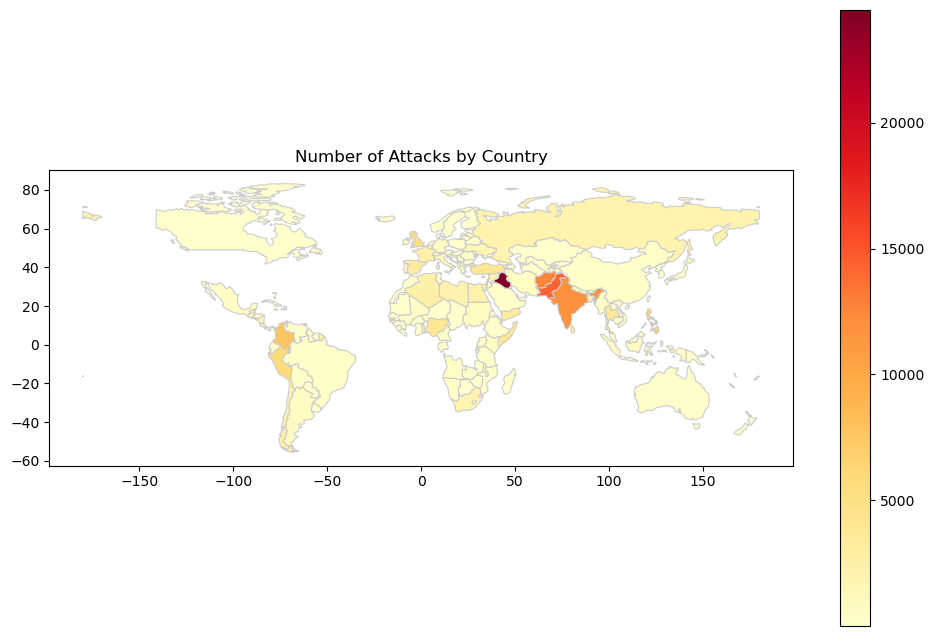

In [17]:
# Load the country shapefile (ensure you have the 'world' shapefile downloaded) 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate the number of attacks by country
attacks_by_country = df_1['Country'].value_counts()
attacks_by_country = attacks_by_country.reset_index().rename(columns={'index': 'Country', 'Country': 'Count'})

# Merge the attack counts with the world shapefile
merged = world.merge(attacks_by_country, left_on='name', right_on='Country')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Attacks by Country')
plt.show()

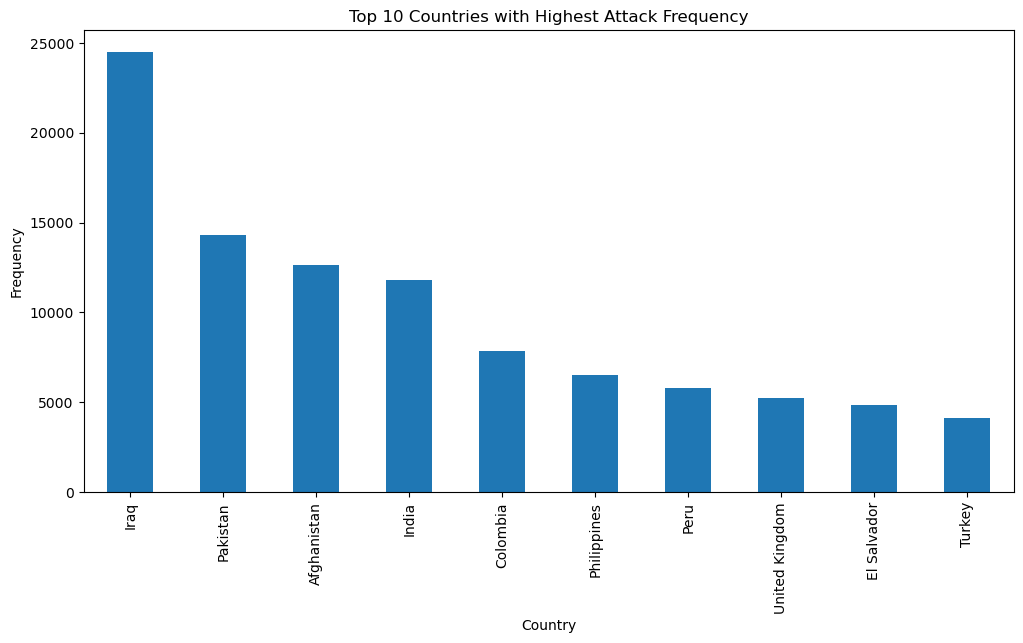

In [18]:
plt.figure(figsize=(12, 6))
df_1['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Highest Attack Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

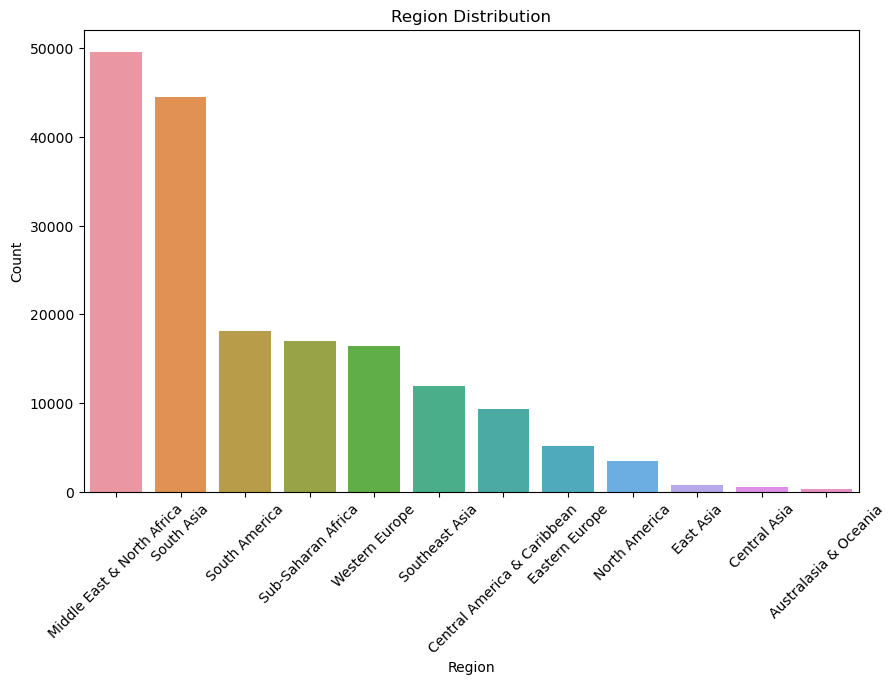

In [19]:
# Frequency distribution for 'Region'
freq_counts_region = df_1['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Region', order=freq_counts_region.index)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

####  Unfortunately, the Middle East and Africa has the most number of Attacks

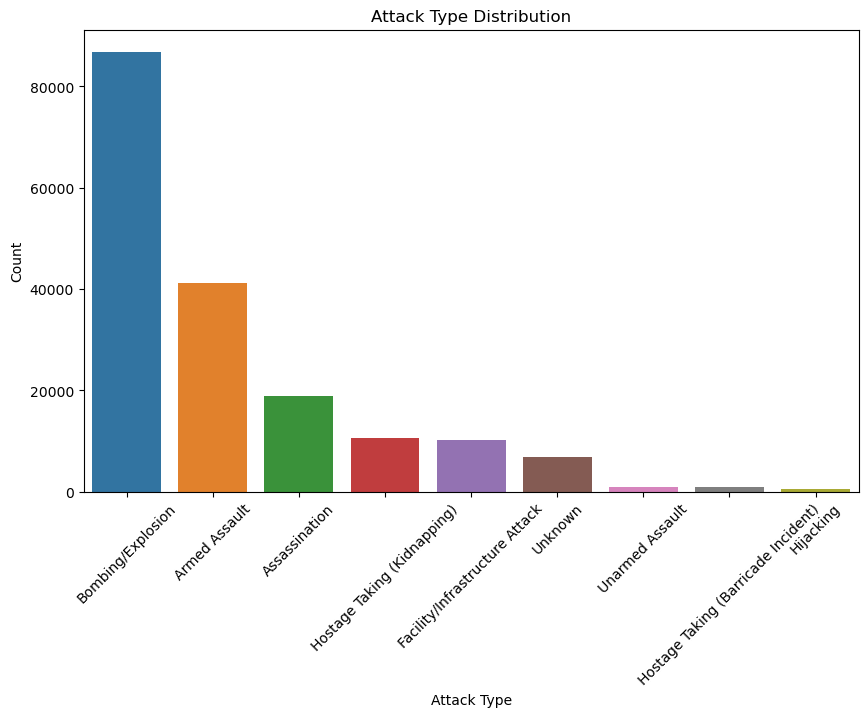

In [20]:
# Frequency distribution for 'AttackType'
freq_counts_attack_type = df_1['AttackType'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='AttackType', order=freq_counts_attack_type.index)
plt.title("Attack Type Distribution")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

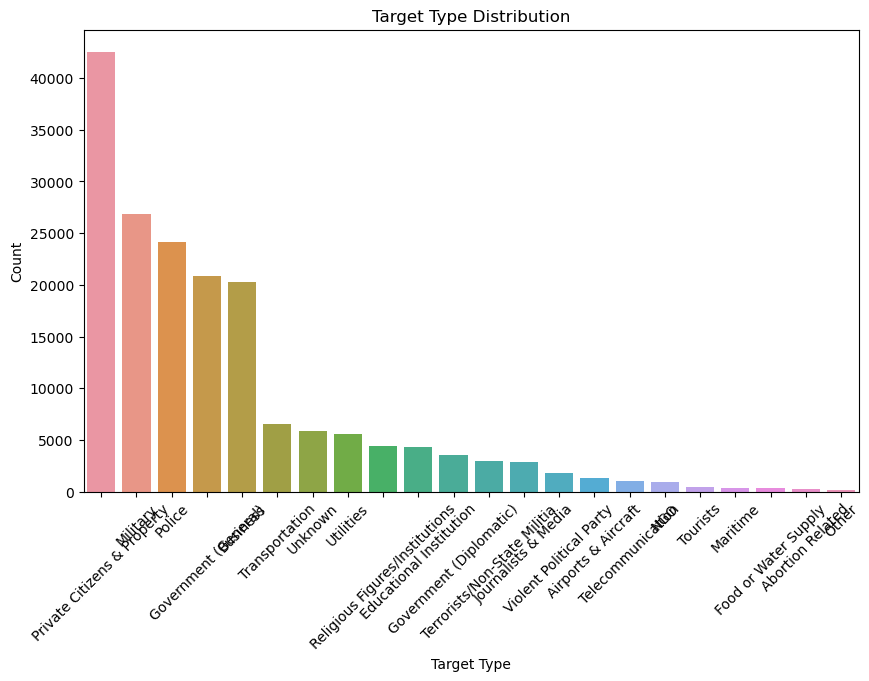

In [21]:
# Frequency distribution for 'Target_type'
freq_counts_target_type = df_1['Target_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Target_type', order=freq_counts_target_type.index)
plt.title("Target Type Distribution")
plt.xlabel("Target Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



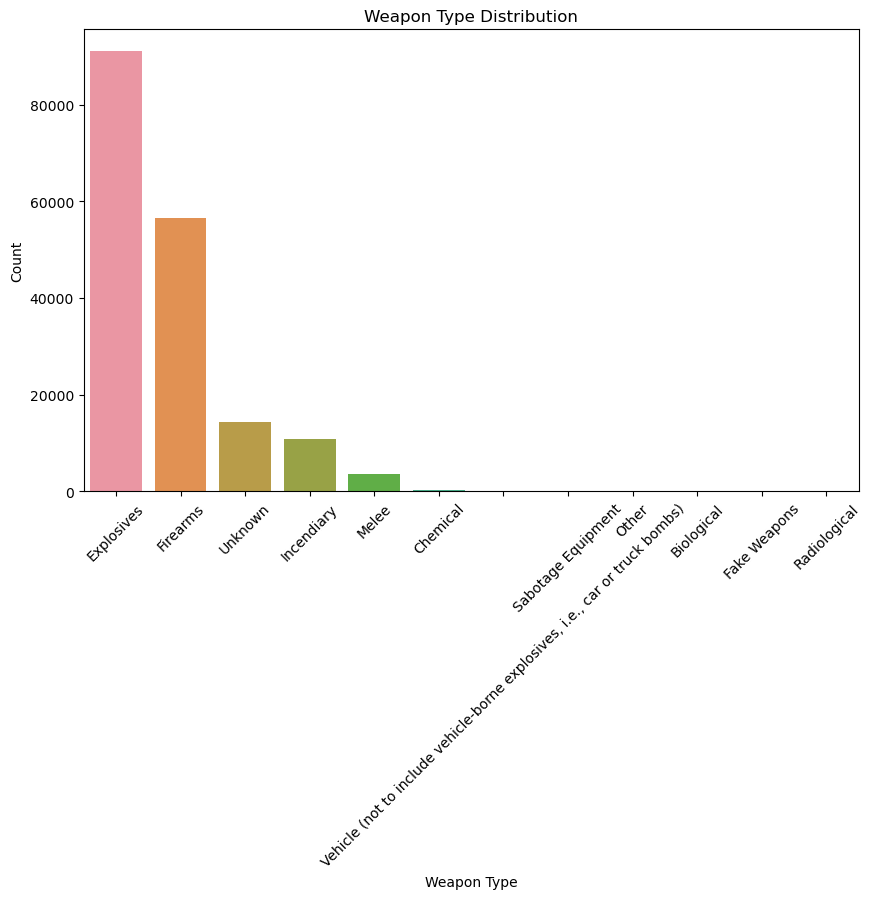

In [22]:
# Frequency distribution for 'Weapon_type'
freq_counts_weapon_type = df_1['Weapon_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Weapon_type', order=freq_counts_weapon_type.index)
plt.title("Weapon Type Distribution")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



In [23]:
num_vars = ['Killed', 'Wounded', 'casualities']

# Calculate summary statistics
summary_stats = df_1[num_vars].describe()
summary_stats

Killed        Wounded    casualities
count  177134.000000  177134.000000  177134.000000
mean        2.231215       2.912614       4.801817
std        11.171577      34.724034      40.532750
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       1.000000
75%         2.000000       2.000000       4.000000
max      1570.000000    8191.000000    9574.000000

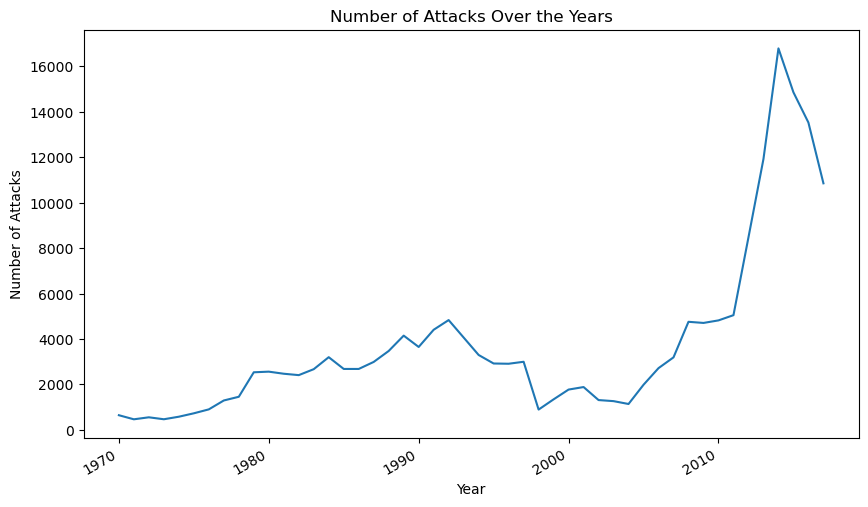

In [24]:
plt.figure(figsize=(10, 6))
attacks_by_year = df_1['Year'].value_counts().sort_index()
attacks_by_year.plot(kind='line')
plt.title('Number of Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [25]:

# Group the data by 'Region' and 'AttackType'
grouped_data = df_1.groupby(['Region', 'AttackType']).size().reset_index(name='Count')

# Create a sunburst chart
fig = px.sunburst(grouped_data, path=['Region', 'AttackType'], values='Count', color='Count')

# Set the chart layout
fig.update_layout(title='Hierarchy of Attack Types by Region')
fig.show()


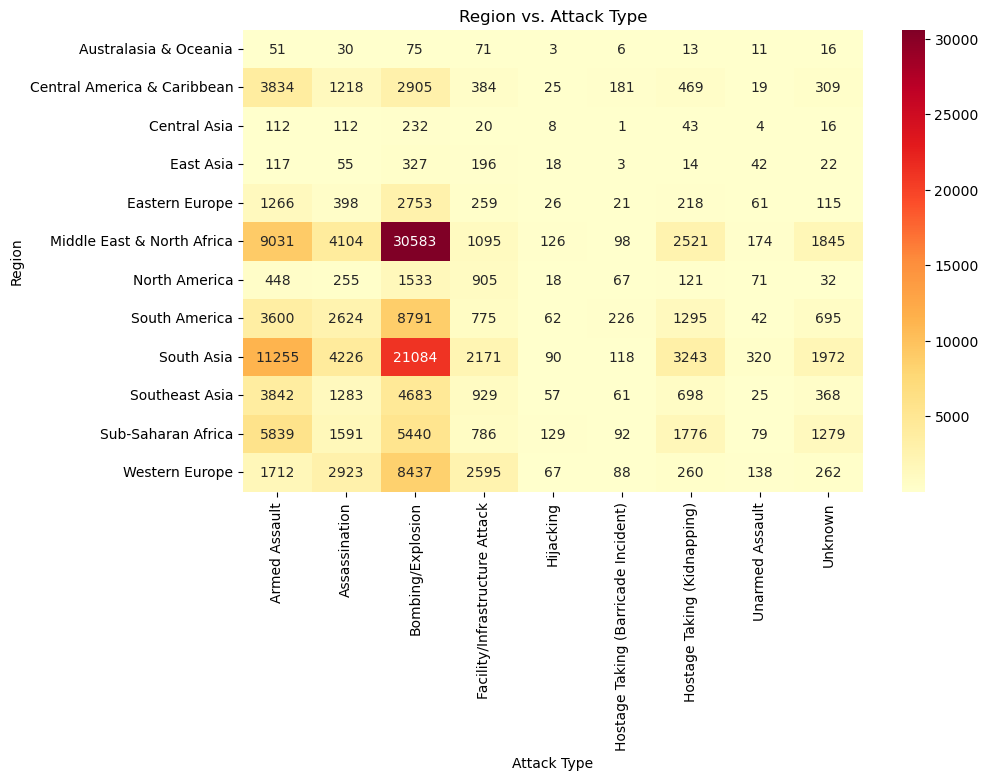

In [26]:
cross_tab = pd.crosstab(df_1['Region'], df_1['AttackType'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Region vs. Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Region')
plt.show()

<Figure size 1000x600 with 0 Axes>

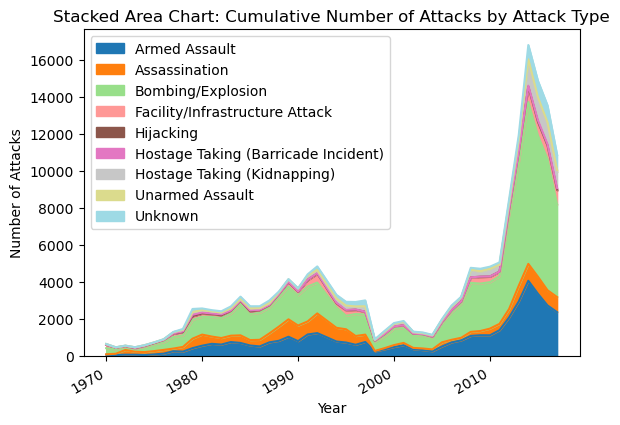

In [27]:
plt.figure(figsize=(10, 6))
stacked_data = df_1.groupby(['Year', 'AttackType']).size().unstack().fillna(0)
stacked_data.plot.area(stacked=True, cmap='tab20')

plt.title('Stacked Area Chart: Cumulative Number of Attacks by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(loc='upper left')
plt.show()

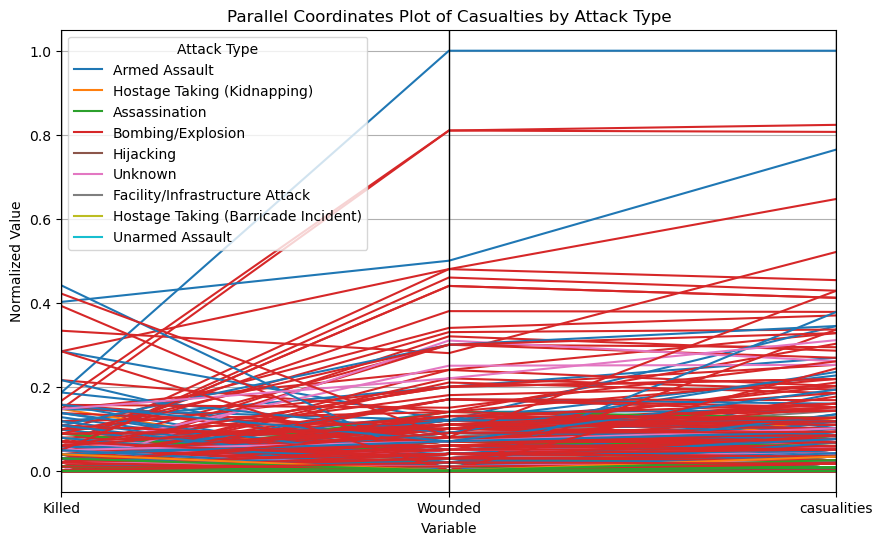

In [45]:


# Select a subset of the data for plotting
subset_data = df_1.sample(n=1000, random_state=42)

# Normalize the numerical variables
normalized_data = (subset_data[num_vars] - subset_data[num_vars].min()) / (subset_data[num_vars].max() - subset_data[num_vars].min())

# Add the 'AttackType' column to the normalized data
normalized_data['AttackType'] = subset_data['AttackType']

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(normalized_data, 'AttackType', colormap='tab10')
plt.title('Parallel Coordinates Plot of Casualties by Attack Type')
plt.xlabel('Variable')
plt.ylabel('Normalized Value')
plt.legend(title='Attack Type')
plt.show()

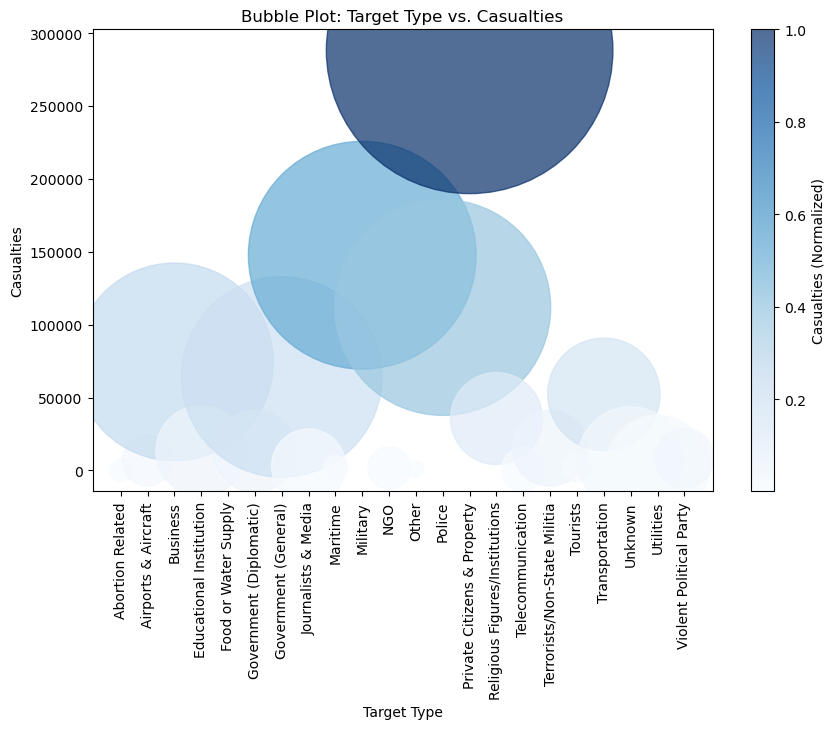

In [29]:
plt.figure(figsize=(10, 6))
bubble_data = df_1.groupby('Target_type').agg({'casualities': 'sum', 'Target_type': 'count'}).rename(columns={'Target_type': 'Attack_Count'}).reset_index()

# Normalize the casualty values for bubble size
bubble_data['casualities_normalized'] = bubble_data['casualities'] / bubble_data['casualities'].max()

plt.scatter(x=bubble_data['Target_type'], y=bubble_data['casualities'], s=bubble_data['Attack_Count'], c=bubble_data['casualities_normalized'], cmap='Blues', alpha=0.7)

plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.ylabel('Casualties')
plt.title('Bubble Plot: Target Type vs. Casualties')
plt.colorbar(label='Casualties (Normalized)')
plt.show()


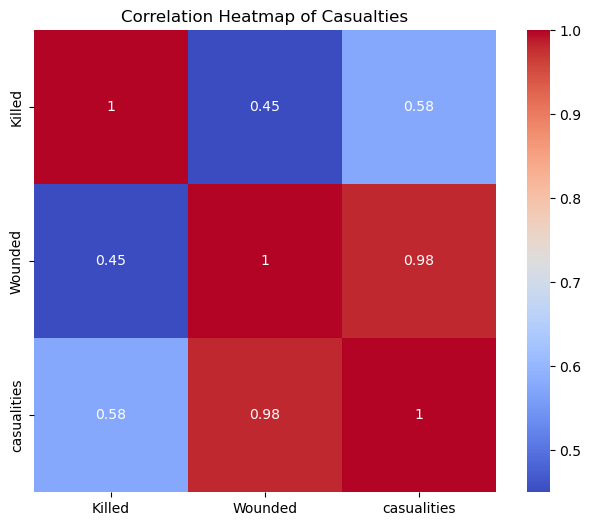

In [31]:
plt.figure(figsize=(8, 6))
corr_matrix = df_1[['Killed', 'Wounded', 'casualities']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Casualties')
plt.show()


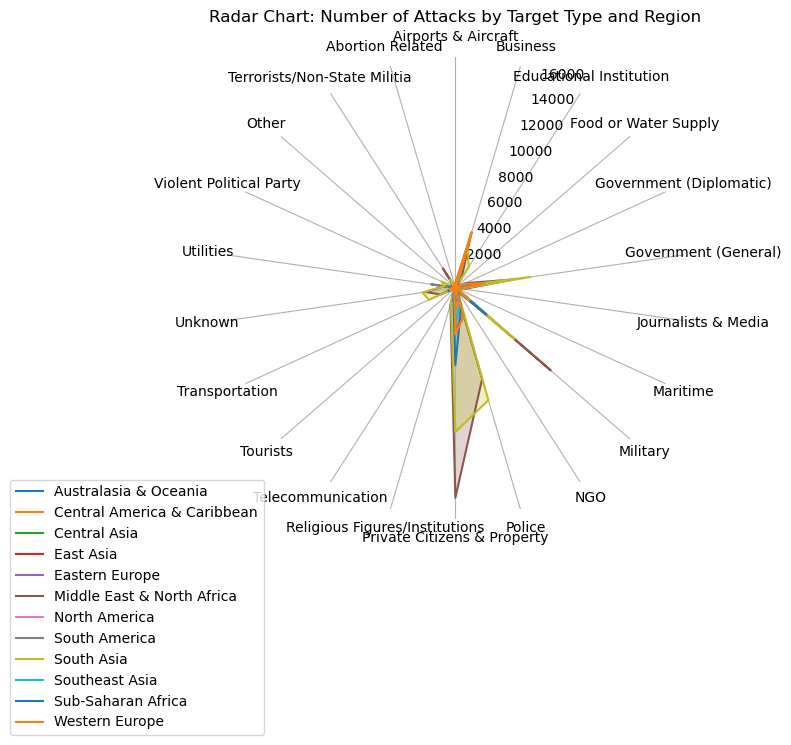

In [32]:
# Group the data by 'Region' and 'Target_type'
grouped_data = df_1.groupby(['Region', 'Target_type']).size().reset_index(name='Count')

# Get unique regions and target types
regions = grouped_data['Region'].unique()
target_types = grouped_data['Target_type'].unique()

# Initialize an empty array to store the counts for each region and target type
counts = np.zeros((len(regions), len(target_types)))

# Populate the counts array with the corresponding values
for index, row in grouped_data.iterrows():
    region = row['Region']
    target_type = row['Target_type']
    count = row['Count']
    region_index = np.where(regions == region)[0][0]
    target_type_index = np.where(target_types == target_type)[0][0]
    counts[region_index, target_type_index] = count

# Define the categories and angles for the radar chart
categories = target_types.tolist()
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Create a radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.yaxis.grid(False)
ax.spines['polar'].set_visible(False)

# Plot each region's data on the radar chart
for i, region in enumerate(regions):
    values = counts[i].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=region)
    ax.fill(angles, values, alpha=0.25)

# Configure plot settings
ax.set_ylim(0, counts.max() * 1.1)
ax.set_title('Radar Chart: Number of Attacks by Target Type and Region')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


#### The most attacks number TARGETS ( private citizens & property )
#### then Military and police
#### in Central america & caribbean its wide to target (Business)

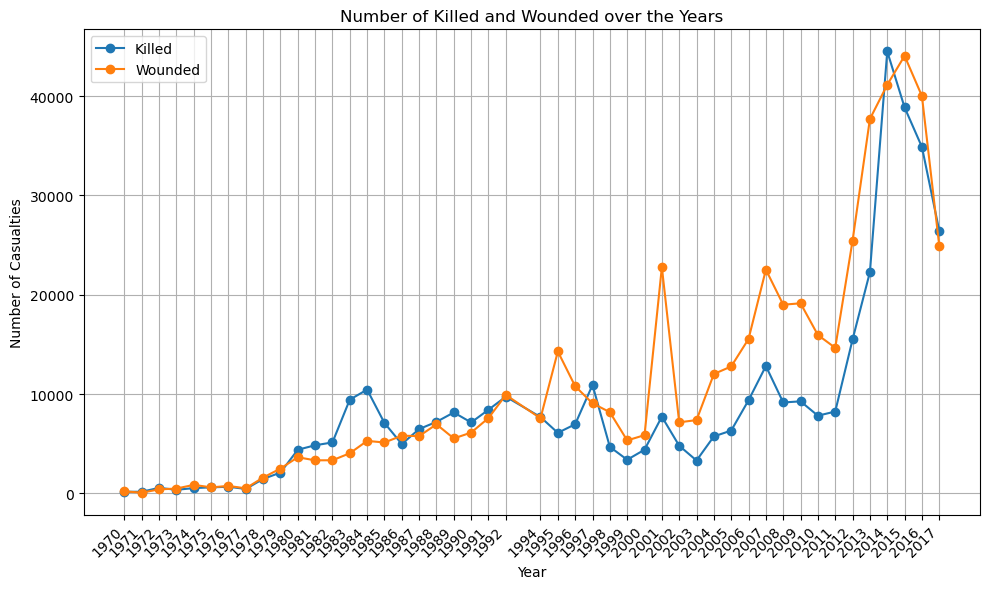

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and group the data
year_killed_wounded = df_1.groupby('Year')['Killed', 'Wounded'].sum().reset_index()

# Set figure size and create a line plot
plt.figure(figsize=(10, 6))
plt.plot(year_killed_wounded['Year'], year_killed_wounded['Killed'], label='Killed', marker='o')
plt.plot(year_killed_wounded['Year'], year_killed_wounded['Wounded'], label='Wounded', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.title('Number of Killed and Wounded over the Years')

# Add gridlines
plt.grid(True)

# Customize legend and axis ticks
plt.legend()
plt.xticks(year_killed_wounded['Year'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#### 2015 and 2016 were sad years